In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

# get the bathymetry file
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [4]:
a = np.arange(25).reshape((5, 5))
m = np.array([[0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0]])
# m = np.zeros_like(a)
# m[1:2, 1:] = 1
# m

In [5]:
am = np.ma.array(a, mask=m)
test_y = np.ma.notmasked_edges(am, axis=0)
test_x = np.ma.notmasked_edges(am, axis=1)
am

masked_array(
  data=[[0, 1, 2, 3, 4],
        [5, --, --, 8, 9],
        [10, --, --, --, 14],
        [15, 16, --, 18, 19],
        [20, 21, 22, 23, 24]],
  mask=[[False, False, False, False, False],
        [False,  True,  True, False, False],
        [False,  True,  True,  True, False],
        [False, False,  True, False, False],
        [False, False, False, False, False]],
  fill_value=999999)

In [6]:
for j in np.arange(len(test_y)):
    print('j = {}'.format(j))
    for i in np.arange(len(test_y[j][0])):
        print('Coastline Coords Y: ({}, {})'.format(test_y[j][0][i], test_y[j][1][i]))

for j in np.arange(len(test_x)):
    print('j = {}'.format(j))
    for i in np.arange(len(test_x[j][0])):
        print('Coastline Coords X: ({}, {})'.format(test_x[j][0][i], test_x[j][1][i]))

j = 0
Coastline Coords Y: (0, 0)
Coastline Coords Y: (0, 1)
Coastline Coords Y: (0, 2)
Coastline Coords Y: (0, 3)
Coastline Coords Y: (0, 4)
j = 1
Coastline Coords Y: (4, 0)
Coastline Coords Y: (4, 1)
Coastline Coords Y: (4, 2)
Coastline Coords Y: (4, 3)
Coastline Coords Y: (4, 4)
j = 0
Coastline Coords X: (0, 0)
Coastline Coords X: (1, 0)
Coastline Coords X: (2, 0)
Coastline Coords X: (3, 0)
Coastline Coords X: (4, 0)
j = 1
Coastline Coords X: (0, 4)
Coastline Coords X: (1, 4)
Coastline Coords X: (2, 4)
Coastline Coords X: (3, 4)
Coastline Coords X: (4, 4)


In [7]:
np.array(test_y).transpose(1, 2, 0).reshape(2, -1)
np.array(test_x).transpose(1, 2, 0).reshape(2, -1)

array([[0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
       [0, 4, 0, 4, 0, 4, 0, 4, 0, 4]])

In [8]:
m

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [14]:
array = m
# Assuming 'array' is your 2D array of 1s and 0s
# axis=0 for transitions along rows, axis=1 for transitions along columns
axis = 1

# Calculate the differences along the specified axis
diffs = np.diff(array, axis=axis)

# Find the indices where transitions occur (from 0 to 1 or 1 to 0)
transition_indices = np.argwhere(diffs != 0)

# # If you want to include the last index where a transition occurred
# if diffs.shape[axis] > 0:
#     last_transition_index = tuple(np.array(transition_indices[-1]) + np.sign(diffs.shape[axis]))
#     transition_indices = np.vstack((transition_indices, last_transition_index))

print(transition_indices)
print(transition_indices.T)

[[1 0]
 [1 2]
 [2 0]
 [2 3]
 [3 1]
 [3 2]]
[[1 1 2 2 3 3]
 [0 2 0 3 1 2]]


In [10]:
np.diff(m, axis=0)
# np.diff(m, axis=1)

array([[ 0,  1,  1,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0, -1,  0, -1,  0],
       [ 0,  0, -1,  0,  0]])

(0.0, 898.0)

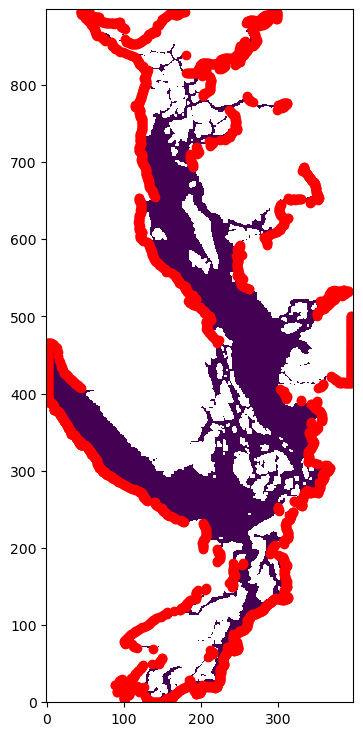

In [11]:
# mask array of grid box thickness based on where there is land (tmask):
# e3t_mask = np.ma.masked_where((tmask[:,:,:] < 0.1), e3t[:,:,:])
mesh_masked = np.ma.masked_array(tmask[0, :, :], mask=tmask[0, :, :])

coastline_y = np.array(np.ma.notmasked_edges(mesh_masked, axis=0))
coastline_x = np.array(np.ma.notmasked_edges(mesh_masked, axis=1))

coast_y = np.array(coastline_y).transpose(1, 2, 0).reshape(2, -1)
coast_x = np.array(coastline_x).transpose(1, 2, 0).reshape(2, -1)


fig, ax = plt.subplots(1, 1, figsize=(5, 9))
ax.imshow(mesh_masked)

ax.plot(coast_y[1], coast_y[0], 'ro')
ax.plot(coast_x[1], coast_x[0], 'ro')

ax.set_ylim([0,898])

In [55]:
transition_indices_x

array([[  1,   1,   2, ..., 896, 896, 896],
       [133, 152, 129, ..., 175, 292, 295]])

(480.0, 520.0)

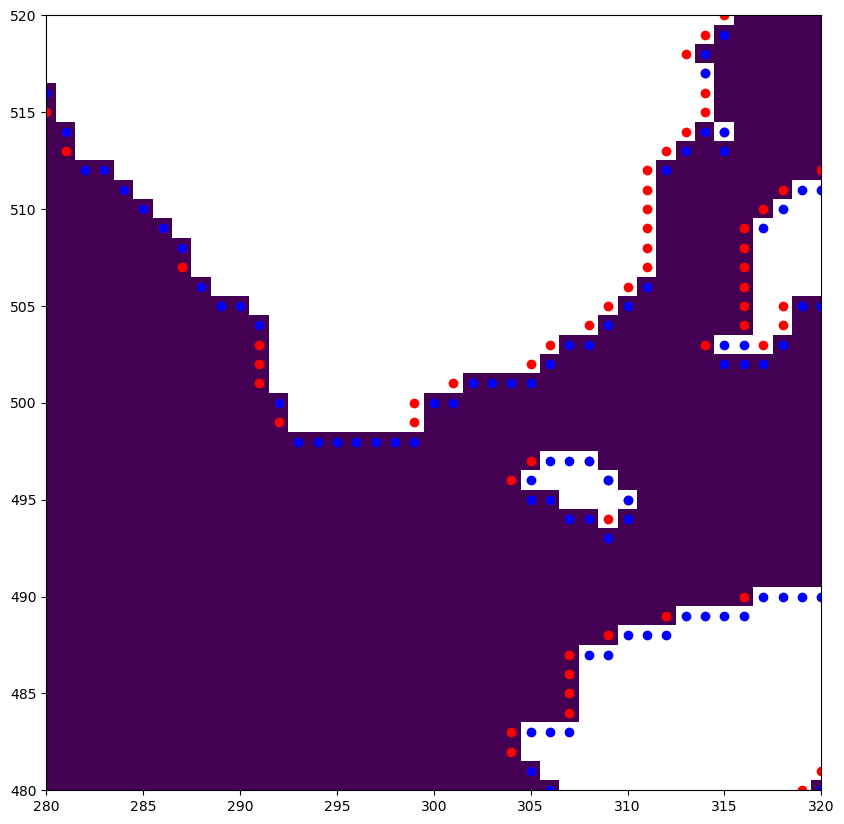

In [54]:
array = 1 - tmask[0]

# Calculate the differences along the specified axis
diffs_x = np.diff(array, axis=1)
diffs_y = np.diff(array, axis=0)

# Find the indices where transitions occur (from 0 to 1 or 1 to 0)
transition_indices_x = np.argwhere(diffs_x != 0).T
transition_indices_y = np.argwhere(diffs_y != 0).T

fig, ax = plt.subplots(1, 1, figsize=(10, 18))
ax.imshow(mesh_masked)

ax.plot(transition_indices_x[1], transition_indices_x[0], 'ro')
ax.plot(transition_indices_y[1], transition_indices_y[0], 'bo')

ax.set_ylim([0,898])
ax.set_xlim([280, 320])
ax.set_ylim([480, 520])

(480.0, 520.0)

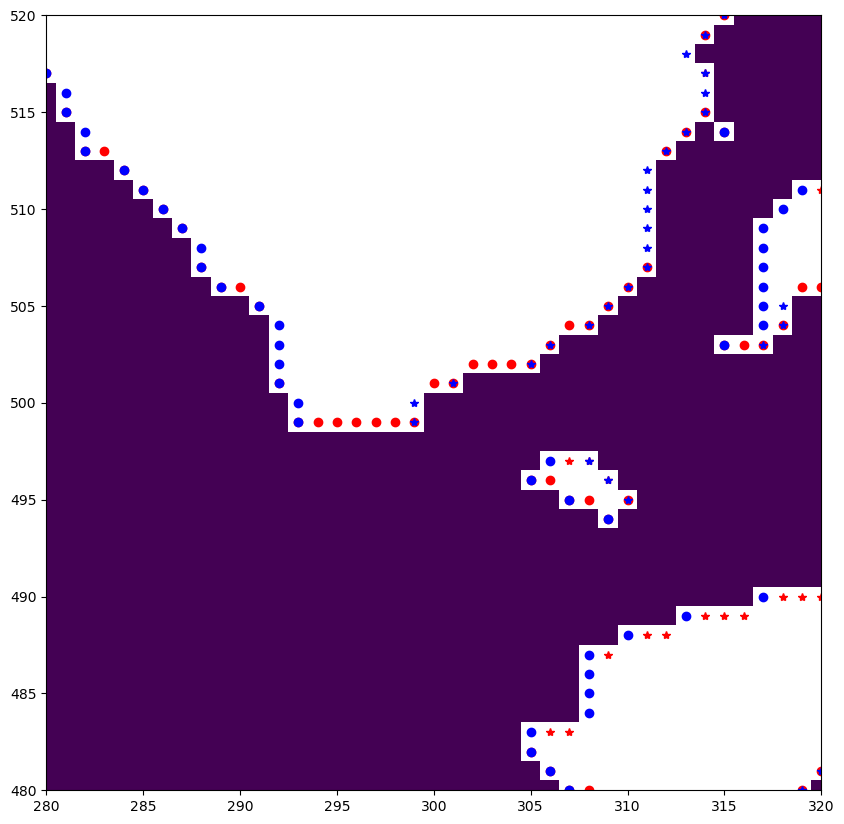

In [73]:
## This one finds the land coastal points
array = np.array(1 - tmask[0])

# Calculate the differences along the specified axis in specific direction
diffs_up = array - np.roll(array, 1, axis=0)
diffs_down = array - np.roll(array, -1, axis=0)
diffs_left = array - np.roll(array, 1, axis=1)
diffs_right = array - np.roll(array, -1, axis=1)

# Find the indices where transitions occur from land to water
idx_up = np.argwhere(diffs_up == -1).T
idx_down = np.argwhere(diffs_down == -1).T
idx_left = np.argwhere(diffs_left == -1).T
idx_right = np.argwhere(diffs_right == -1).T

fig, ax = plt.subplots(1, 1, figsize=(10, 18))
ax.imshow(mesh_masked)

ax.plot(idx_up[1], idx_up[0], 'ro')
ax.plot(idx_down[1], idx_down[0], 'r*')
ax.plot(idx_left[1], idx_left[0], 'bo')
ax.plot(idx_right[1], idx_right[0], 'b*')

ax.set_ylim([0,898])
ax.set_xlim([280, 320])
ax.set_ylim([480, 520])

(0.0, 898.0)

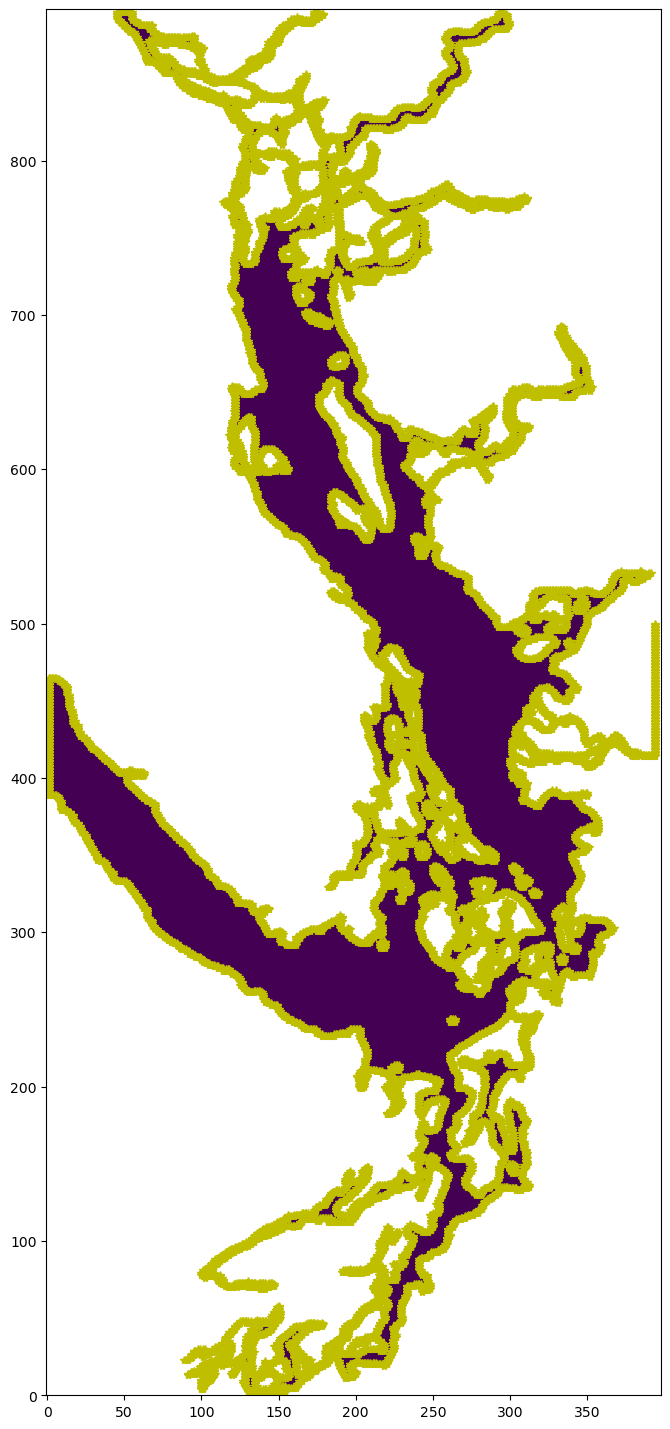

In [101]:
## This one finds the land coastal points
array = np.array(1 - tmask[0])

# Calculate the differences along the specified axis in specific direction
diffs_up = array - np.roll(array, 1, axis=0)
diffs_down = array - np.roll(array, -1, axis=0)
diffs_left = array - np.roll(array, 1, axis=1)
diffs_right = array - np.roll(array, -1, axis=1)

diffs_ul = array - np.roll(np.roll(array, 1, axis=0), 1, axis=1)
diffs_ur = array - np.roll(np.roll(array, 1, axis=0), -1, axis=1)
diffs_ll = array - np.roll(np.roll(array, -1, axis=0), 1, axis=1)
diffs_lr = array - np.roll(np.roll(array, -1, axis=0), -1, axis=1)

# Find the indices where transitions occur from land to water
# idx_up = np.argwhere(diffs_up == 1).T
# idx_down = np.argwhere(diffs_down == 1).T
# idx_left = np.argwhere(diffs_left == 1).T
# idx_right = np.argwhere(diffs_right == 1).T

idx_up = np.argwhere(diffs_up == 1)
idx_down = np.argwhere(diffs_down == 1)
idx_left = np.argwhere(diffs_left == 1)
idx_right = np.argwhere(diffs_right == 1)

# idx_ul = np.argwhere(diffs_ul == 1).T
# idx_ur = np.argwhere(diffs_ur == 1).T
# idx_ll = np.argwhere(diffs_ll == 1).T
# idx_lr = np.argwhere(diffs_lr == 1).T

idx_ul = np.argwhere(diffs_ul == 1)
idx_ur = np.argwhere(diffs_ur == 1)
idx_ll = np.argwhere(diffs_ll == 1)
idx_lr = np.argwhere(diffs_lr == 1)

idx_unique = np.unique(np.concatenate((idx_up, idx_down, idx_left, idx_right, idx_ul, idx_ur, idx_ll, idx_lr)), axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(10, 18))
ax.imshow(mesh_masked)

ax.plot(idx_unique[1], idx_unique[0], 'y*')

# ax.plot(idx_up[1], idx_up[0], 'ro')
# ax.plot(idx_down[1], idx_down[0], 'r*')
# ax.plot(idx_left[1], idx_left[0], 'bo')
# ax.plot(idx_right[1], idx_right[0], 'b*')

# ax.plot(idx_ul[1], idx_ul[0], 'm^')
# ax.plot(idx_ur[1], idx_ur[0], 'ms')
# ax.plot(idx_ll[1], idx_ll[0], 'g^')
# ax.plot(idx_lr[1], idx_lr[0], 'gs')

ax.set_ylim([0,898])
# ax.set_xlim([280, 320])
# ax.set_ylim([480, 520])

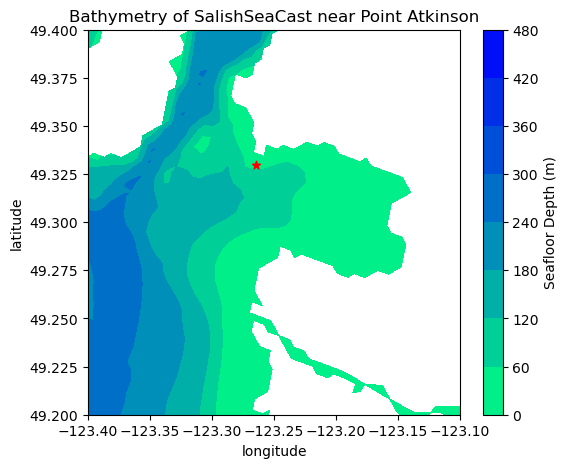

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
colours = ax.contourf(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap='winter_r')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Bathymetry of SalishSeaCast near Point Atkinson')

ax.set_xlim([-123.4, -123.1])
ax.set_ylim([49.2, 49.4])

ax.scatter(-123.264903, 49.329514, color='red', marker='*')

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Seafloor Depth (m)');